## Librerías

In [1]:
import sympy as sp
from sympy import lambdify
import matplotlib.pyplot as plt
import numpy as np

Definimos una función para sacar la norma de algun vector:


In [18]:
def norma(x):
  return sp.sqrt(np.dot(x,x)).simplify()

Considere inicialmente la curva $\alpha (t)$ dada por:
$$\alpha (t) = ( a cos(t), b sin(t), 0)$$

Note que no se puede solucionar mediante la longitud de arco.

**1. Evalute of curvature k(t) of $\alpha(t)$**

Como es una curvatura tridimensional, entonces la curvatura es dada por la siguiente formula:
$$k(t) = \frac {|\alpha'(t) \times \alpha''(t)|}{|\alpha'|^{3}}$$


In [26]:
## Definimos inicialmente los parametros con sympy
a,b = sp.symbols("a,b", positive = True, real = True)
s = sp.symbols("s")
x,y,z,x1,y1,z1,alpha,dalpha,ddalpha,T,dT,N,B,k = sp.symbols("x,y,z,x1,y1,z1,alpha,dalpha,ddalpha,T,dT,N,B,k", cls = sp.Function)
da_norma = sp.symbols ("da_norma", cls = sp.Function)

In [27]:
#Definimos las componentes de alpha
x = a*sp.cos(s)
y = b*sp.sin(s)
z = 0
alpha = (x,y,z)
print('alpha(s) = ',alpha)
print('norma alpha = ', norma(alpha))
#Como la norma no es 1 es una curva tridimensional y no se puede utilizar la parametrización por longitud de arco

alpha(s) =  (a*cos(s), b*sin(s), 0)
norma alpha =  sqrt(a**2*cos(s)**2 + b**2*sin(s)**2)


In [28]:
## Primera derivada de alpha
dalpha = (sp.diff(x,s), sp.diff(y,s), sp.diff(z,s))
print(dalpha)

(-a*sin(s), b*cos(s), 0)


In [29]:
## Segunda derivada de alpha
ddalpha = (sp.diff(x,s,2), sp.diff(y,s,2), sp.diff(z,s,2))
print(ddalpha)

(-a*cos(s), -b*sin(s), 0)


In [30]:
k  = norma(np.cross(dalpha,ddalpha))/(norma(dalpha)**3)
print('Curvatura', k)

Curvatura a*b/(a**2*sin(s)**2 + b**2*cos(s)**2)**(3/2)


In [31]:
k.subs(a,2).subs(b,3)

6/(4*sin(s)**2 + 9*cos(s)**2)**(3/2)

**2.Obtain the evolute for the curve α(t).** 
La envolvente de una curva esta dada por la siguiente ecuación:
$$β(t) = α(t) + \frac{1}{k(t)} \hat{N(t)}$$
Como necesitamos el vector normal, esta dado de la siguiente manera:
$$ \hat{N}(t) = \frac{T'}{|T'|}$$
Donde necesitamos el vector tangente dado por: 
$$\hat{T(t)} = \frac{\alpha'(s)}{|\alpha'(s)|}$$

In [36]:
T = (sp.diff(x,s)/norma(dalpha), sp.diff(y,s)/norma(dalpha), sp.diff(z,s)/norma(dalpha))
print('T = ', T)
print('norma = ', norma(T))

T =  (-a*sin(s)/sqrt(a**2*sin(s)**2 + b**2*cos(s)**2), b*cos(s)/sqrt(a**2*sin(s)**2 + b**2*cos(s)**2), 0)
norma =  1


In [33]:
# Obtenemos una nuevas variables dadas por las componentes del vector tangente
x1 = -a*sp.sin(s)/sp.sqrt(a**2*sp.sin(s)**2 + b**2*sp.cos(s)**2)
y1 = b*sp.cos(s)/sp.sqrt(a**2*sp.sin(s)**2 + b**2*sp.cos(s)**2)
z1 = 0

In [35]:
# Obtenemos la primera derivada del vector tangente
dT =(sp.diff(x1,s), sp.diff(y1,s), sp.diff(z1,s))
print('T- prima = ', dT)
print('norma =', norma(dT))

T- prima =  (-a*cos(s)/sqrt(a**2*sin(s)**2 + b**2*cos(s)**2) - a*(-a**2*sin(s)*cos(s) + b**2*sin(s)*cos(s))*sin(s)/(a**2*sin(s)**2 + b**2*cos(s)**2)**(3/2), -b*sin(s)/sqrt(a**2*sin(s)**2 + b**2*cos(s)**2) + b*(-a**2*sin(s)*cos(s) + b**2*sin(s)*cos(s))*cos(s)/(a**2*sin(s)**2 + b**2*cos(s)**2)**(3/2), 0)
norma = a*b*sqrt((a**2*sin(s)**2 - b**2*sin(s)**2 + b**2)**(-2))


In [37]:
N = (sp.diff(x1,s)/norma(dT), sp.diff(y1,s)/norma(dT), sp.diff(z1,s)/norma(dT))
print('N =', N)
print('norma =', norma(N) )

N = ((-a*cos(s)/sqrt(a**2*sin(s)**2 + b**2*cos(s)**2) - a*(-a**2*sin(s)*cos(s) + b**2*sin(s)*cos(s))*sin(s)/(a**2*sin(s)**2 + b**2*cos(s)**2)**(3/2))/(a*b*sqrt((a**2*sin(s)**2 - b**2*sin(s)**2 + b**2)**(-2))), (-b*sin(s)/sqrt(a**2*sin(s)**2 + b**2*cos(s)**2) + b*(-a**2*sin(s)*cos(s) + b**2*sin(s)*cos(s))*cos(s)/(a**2*sin(s)**2 + b**2*cos(s)**2)**(3/2))/(a*b*sqrt((a**2*sin(s)**2 - b**2*sin(s)**2 + b**2)**(-2))), 0)
norma = 1


In [38]:
B = (x + 1/k * sp.diff(x1,s)/norma(dT), y + 1/k * sp.diff(y1,s)/norma(dT), z + 1/k * sp.diff(z1,s)/norma(dT) )
print('Envolvente =', B)

Envolvente = (a*cos(s) + (a**2*sin(s)**2 + b**2*cos(s)**2)**(3/2)*(-a*cos(s)/sqrt(a**2*sin(s)**2 + b**2*cos(s)**2) - a*(-a**2*sin(s)*cos(s) + b**2*sin(s)*cos(s))*sin(s)/(a**2*sin(s)**2 + b**2*cos(s)**2)**(3/2))/(a**2*b**2*sqrt((a**2*sin(s)**2 - b**2*sin(s)**2 + b**2)**(-2))), b*sin(s) + (a**2*sin(s)**2 + b**2*cos(s)**2)**(3/2)*(-b*sin(s)/sqrt(a**2*sin(s)**2 + b**2*cos(s)**2) + b*(-a**2*sin(s)*cos(s) + b**2*sin(s)*cos(s))*cos(s)/(a**2*sin(s)**2 + b**2*cos(s)**2)**(3/2))/(a**2*b**2*sqrt((a**2*sin(s)**2 - b**2*sin(s)**2 + b**2)**(-2))), 0)


**3.Plot the curves α(t) and β(t) in the same frame. Set values a = 2 and b = 3 for the plot.**

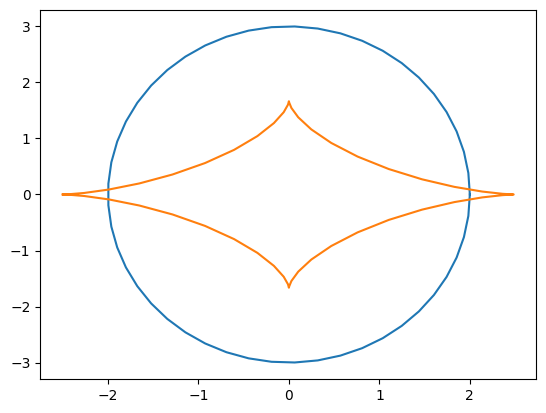

In [42]:
t = np.linspace(0,2*np.pi)
X = lambdify(s,alpha[0].subs(a,2))(t)
Y = lambdify(s,alpha[1].subs(b,3))(t)
B1 =lambdify(s,B[0].subs(a,2).subs(b,3))(t) 
B2 =lambdify(s,B[1].subs(a,2).subs(b,3))(t) 
plt.plot(X,Y)
plt.plot(B1,B2)
plt.show()